In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Optimizers 

Once we have calculated the gradient, we can use this information to adjust weights and biases to decrease the measure of loss. In a previous toy example, we showed how we could successfully decrease a neuron’s activation function’s (ReLU) output in this manner. Recall that we subtracted a fraction of the gradient for each weight and bias parameter. While very rudimentary, this is still a commonly used optimizer called ​Stochastic Gradient Descent (SGD)​. As you will soon discover, most optimizers are just variants of SGD.

### Stochastic Gradient Descent (SGD) 

There are some naming conventions with this optimizer that can be confusing, so let’s walk through those first. You might hear the following names: - Stochastic Gradient Descent, SGD - Vanilla Gradient Descent, Gradient Descent, GD, or Batch Gradient Descent, BGD - Mini-batch Gradient Descent, MBGD The first name, ​Stochastic Gradient Descent​, historically refers to an optimizer that fits a single sample at a time. The second optimizer, ​Batch Gradient Descent​, is an optimizer used to fit a whole dataset at once. The last optimizer, ​Mini-batch Gradient Descent​, is used to fit slices of a dataset, which we’d call batches in our context. The naming convention can be confusing here for multiple reasons. First, in the context of deep learning and this book, we call slices of data ​batches​, where, historically, the term to refer to slices of data in the context of Stochastic Gradient Descent was mini-batches​. In our context, it does not matter if the batch contains a single sample, a slice of the dataset, or the full dataset — as a batch of the data. Additionally, with the current code, we are fitting the full dataset; following this naming convention, we would use ​Batch Gradient Descent​. In a future chapter, we’ll introduce data slices, or ​batches​, so we should start by using the Mini-batch Gradient Descent​ optimizer. That said, current naming trends and conventions with Stochastic Gradient Descent in use with deep learning today have merged and normalized all of these variants, to the point where we think of the ​Stochastic Gradient Descent​ optimizer as one that assumes a batch of data, whether that batch happens to be a single sample, every sample in a dataset, or some subset of the full dataset at a time. In the case of Stochastic Gradient Descent, we choose a learning rate, such as ​1.0.​ We then subtract the ​learning_rate · parameter_gradients​ from the actual parameter values. If our learning rate is 1, then we’re subtracting the exact amount of gradient from our parameters. We’re going to start with 1 to see the results, but we’ll be diving more into the learning rate shortly. Let’s create the SGD optimizer class code. The initialization method will take hyper-parameters, starting with the learning rate, for now, storing them in the class’ properties. The ​update_params​ method, given a layer object, performs the most basic optimization, the same way that we performed it in the previous chapter — it multiplies the gradients stored in the layers by the negated learning rate

and adds the result to the layer’s parameters. It seems that, in the previous chapter, we performed SGD optimization without knowing it. The full class so far:

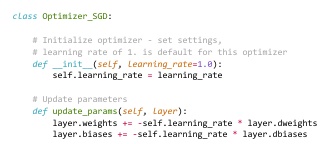

To use this, we need to create an optimizer object:


Then update our network layer’s parameters after calculating the gradient using:
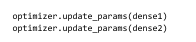

Recall that the layer object contains its parameters (weights and biases) and also, at this stage, the gradient that is calculated during backpropagation. We store these in the layer’s properties so that the optimizer can make use of them. In our main neural network code, we’d bring the optimization in after backpropagation. Let’s make a 1x64 densely-connected neural network (1 hidden layer with 64 neurons) and use the same dataset as before:

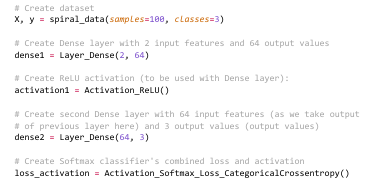

The next step is to create the optimizer’s object:

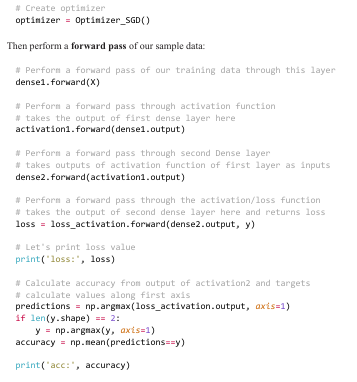


Next, we do our ​backward pass​, which is also called ​backpropagation​:

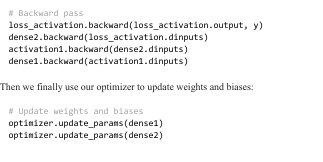

10 This is everything we need to train our model! But why would we only perform this optimization once, when we can perform it lots of times by leveraging Python’s looping capabilities? We will repeatedly perform a forward pass, backward pass, and optimization until we reach some stopping point. Each full pass through all of the training data is called an ​epoch​. In most deep learning tasks, a neural network will be trained for multiple epochs, though the ideal scenario would be to have a perfect model with ideal weights and biases after only one epoch. To add multiple epochs of training into our code, we will initialize our model and run a loop around all the code performing the forward pass, backward pass, and optimization calculations:

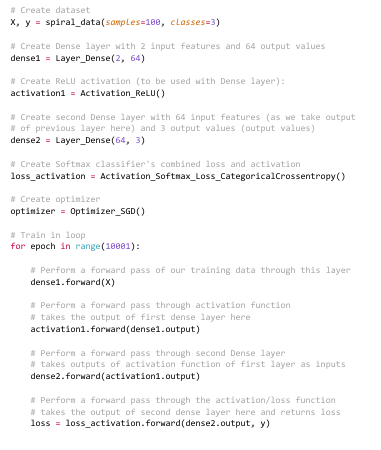

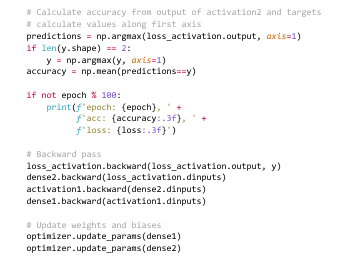
This gives us an update of where we are (epochs), the model’s accuracy, and loss every 100 epochs. Initially, we can see consistent improvement:

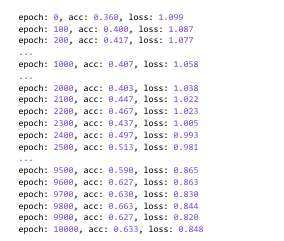

Additionally, we’ve prepared animations to help visualize the training process and to convey the impact of various optimizers and their hyperparameters. The left part of the animation canvas


contains dots, where color represents each of the 3 classes of the data, the coordinates are features, and the background colors show the model prediction areas. Ideally, the points’ colors and the background should match if the model classifies correctly. The surrounding area should also follow the data’s “trend” — which is what we’d call generalization — the ability of the model to correctly predict unseen data. The colorful squares on the right show weights and biases — red for positive and blue for negative values. The matching areas right below the Dense 1 bar and next to the Dense 2 bar show the updates that the optimizer performs to the layers. The updates might look overly strong compared to the weights and biases, but that’s because we’ve visually normalized them to the maximum value, or else they would be almost invisible since the updates are quite small at a time. The other 3 graphs show the loss, accuracy, and current learning rate values in conjunction with the training time, epochs in this case.


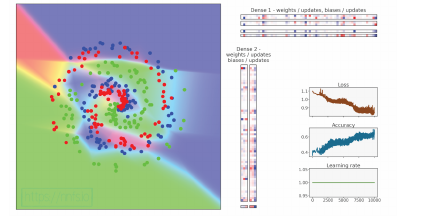
Figure 1:​ Model training with Stochastic Gradient Descent optimizer. Epilepsy Warning, there are quick flashing colors in the animation:

Our neural network mostly stays stuck at around a loss of 1 and later 0.85-0.9, and an accuracy around 0.60. The animation also has a “flashy wiggle” effect, which most likely means we chose too high of a learning rate. Given that loss didn’t decrease much, we can assume that this learning rate, being too high, also caused the model to get stuck in a ​local minimum​, which we’ll learn more about soon. Iterating over more epochs doesn’t seem helpful at this point, which tells us that we’re likely stuck with our optimization. Does this mean that this is the most we can get from our optimizer on this dataset? Recall that we’re adjusting our weights and biases by applying some fraction, in this case, ​1.0​, to the gradient and subtracting this from the weights and biases. This fraction is called the ​learning rate​ (LR) and is the primary adjustable parameter for the optimizer as it decreases loss. To gain an intuition for adjusting, planning, or initially setting the learning rate, we should first understand how the learning rate affects the optimizer and output of the loss function.

## Learning Rate 

So far, we have a gradient of a model and the loss function with respect to all of the parameters, and we want to apply a fraction of this gradient to the parameters in order to descend the loss value. In most cases, we won’t apply the negative gradient as is, as the direction of the function’s steepest descent will be continuously changing, and these values will usually be too big for meaningful model improvements to occur. Instead, we want to perform small steps — calculating the gradient, updating parameters by a negative fraction of this gradient, and repeating this in a loop. Small steps ensure that we are following the direction of the steepest descent, but these steps can also be too small, causing learning stagnation — we’ll explain this shortly. Let’s forget, for a while, that we are performing gradient descent of an n-dimensional function (our loss function), where n is the number parameters (weights and biases) that the model contains, and assume that we have just one dimension to the loss function (a singular input). Our goal for the following images and animations is to visualize some concepts and gain an intuition; thus, we will not use or present certain optimizer settings, and instead will be considering things in more general terms. That said, we’ve used a real SGD optimizer on a real function to prepare all of the following examples. Here’s the function where we want to determine what input to it will result in the lowest possible output:

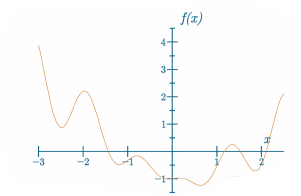
Fig 10.02:​ Example function to minimize the output.

We can see the ​global minimum​ of this function, which is the lowest possible ​y​ value that this function can output. This is the goal — to minimize the function’s output to find the global minimum. The values of the axes are not important in this case. The goal is only to show the function and the learning rate concept. Also, remember that this one-dimensional function example is being used merely to aid in visualization. It would be easy to solve this function with simpler math than what is required to solve the much larger n-dimensional loss function for neural networks, where n (which is the number of weights and biases) can be in the millions or even billions (or more). When we have millions of, or more, dimensions, gradient descent is the best-known way to search for a global minimum. We’ll start descending from the left side of this graph. With an example learning rate:
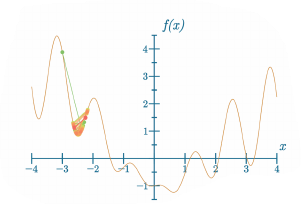

Figure 3:​ Stuck in the first local minimum.
The learning rate turned out to be too small. Small updates to the parameters caused stagnation in the model’s learning — the model got stuck in a local minimum. The ​local minimum​ is a minimum that is near where we look but isn’t necessarily the global minimum, which is the absolute lowest point for a function. With our example here, as well as with optimizing full neural networks, we do not know where the global minimum is. How do we know if we’ve reached the global minimum or at least gotten close? The loss function measures how far the model is with its predictions to the real target values, so, as long as the loss value is not ​0​ or very close to ​0​, and the model stopped learning, we’re at some local minimum. In reality, we almost never approach a loss of ​0​ for various reasons. One reason for this may be imperfect neural network hyperparameters. Another reason for this may be insufficient data. If you did reach a loss of 0 with a neural network, you should find it suspicious, for reasons we’ll get into later in this book.
We can try to modify the learning rate:
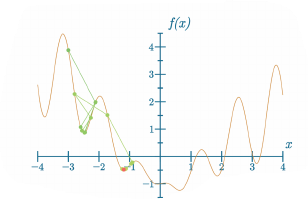
Figure 4:​ Stuck in the second local minimum.

This time, the model escaped this local minimum but got stuck at another one. Let’s see one more example after another learning rate change:

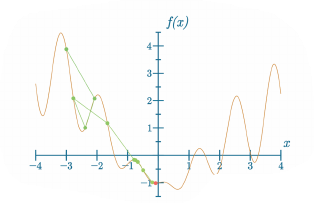
Fig 10.05:​ Stuck in the third local minimum, near the global minimum.

This time the model got stuck at a local minimum near the global minimum. The model was able to escape the “deeper” local minimums, so it might be counter-intuitive why it is stuck here. Remember, the model follows the direction of steepest descent of the loss function, no matter how large or slight the descent is. For this reason, we’ll introduce momentum and the other techniques to prevent such situations.

Momentum, in an optimizer, adds to the gradient what, in the physical world, we could call inertia — for example, we can throw a ball uphill and, with a small enough hill or big enough applied force, the ball can roll-over to the other side of the hill. Let’s see how this might look with the model in training:

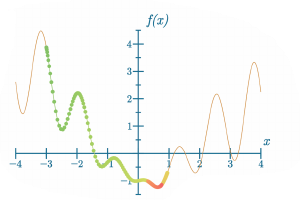
Figure 6:​ Reached the global minimum, too low learning rate.

We used a very small learning rate here with a large momentum. The color change from green, through orange to red presents the advancement of the gradient descent process, the steps. We can see that the model achieved the goal and found the global minimum, but this took many steps. Can this be done better?
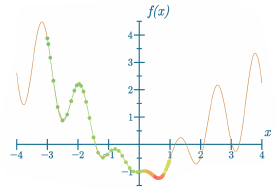
Fig 10.07:​ Reached the global minimum, better learning rate.

And even further:

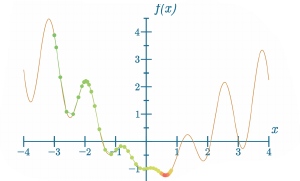

Fig 10.08:​ Reached the global minimum, significantly better learning rate.

22 With these examples, we were able to find the global minimum in about 200, 100, and 50 steps, respectively, by modifying the learning rate and the momentum. It’s possible to significantly shorten the training time by adjusting the parameters of the optimizer. However, we have to be careful with these hyper-parameter adjustments, as this won’t necessarily always help the model:
With the learning rate set too high, the model might not be able to find the global minimum. Even, at some point, if it does, further adjustments could cause it to jump out of this minimum. We’ll see this behavior later in this chapter — try to take a close look at results and see if you can find it, as well as the other issues we’ve described, from the different optimizers as we work through them.

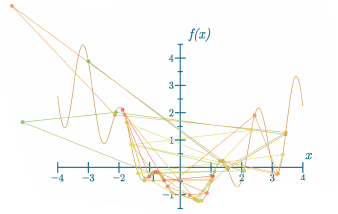

Fig 10.09:​ Unstable model, learning rate too big.

With the learning rate set too high, the model might not be able to find the global minimum. Even, at some point, if it does, further adjustments could cause it to jump out of this minimum. We’ll see this behavior later in this chapter — try to take a close look at results and see if you can find it, as well as the other issues we’ve described, from the different optimizers as we work through them.
